In [185]:
#basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#text process
import nltk
import unidecode
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Processamento dos dados

Como existem dados textuais podemos usar as funções já utilizadas no trabalho anterior




In [186]:
with open('./data/dataset.csv', encoding="utf8") as file:
    df = pd.read_csv(file)
    
df.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
2,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
3,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
4,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


## Separação treino e teste

In [187]:
from sklearn.model_selection import train_test_split

df_train_raw, df_test_raw = train_test_split(df, test_size=0.2)

In [188]:
print(df_train_raw.shape)
df_train_raw.head()

(8700, 5)


,id,keyword,location,text,target
9691,9691,tornado,NaN,Marley Brinx gives a striptease and then sprea...,0
4607,4607,emergency%20services,NaN,Emergency Services Committee and Personnel Com...,0
8719,8719,sinking,NaN,HELP ME I'M SINKING,0
2660,2660,crush,"San Antonio, TX",women crush ???? http://t.co/CFXhQHvbVB,0
2892,2892,damage,BGSU,@f_body95 never riding in the gaymaro ... Woul...,0


In [189]:
print(df_test_raw.shape)
df_test_raw.head()

(2176, 5)


,id,keyword,location,text,target
4950,4950,exploded,"Ìth Cliath, Ìäire",@rickoshea @AnthonySHead @NicholasBrendon @Dub...,0
5940,5940,hazard,Karma,Whoever got compared with Hazard faded away on...,0
2295,2295,cliff%20fall,NaN,Mega keen for hiking tomorrow! Hope i don't fa...,0
1263,1263,blood,NaN,Man . somebody gotta stop Sbee dude too fuckin...,0
3973,3973,devastation,Vancouver BC,Is This Country Latin America's Next 'Argentin...,0


## Limpeza dos textos dos tweets

Um coisa interessante de se pensar é que os dados textuais se dão através de textos escritos por pessoas em sua rede social tweeter e podem existir erros de digitação assim é importante tentar corrigir as palavras mal escritas. Para isso podemos usar a biblioteca spell checker.

In [190]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Reutilizando funções do trabalho prático

In [191]:
def remove_specials(tokens):
    return [unidecode.unidecode(word) for word in tokens]

def remove_punctuation(tokens):
    table = str.maketrans("","",string.punctuation)
    return [w.translate(table) for w in tokens]

def array_lower(tokens):
    return [w.lower() for w in tokens]

def remove_no_words(tokens):
    return [word for word in tokens if word.isalpha()]

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [w for w in tokens if not w in stop_words]


def text_cleaner(string):
   
    # Dividindo texto em tokens
    string = word_tokenize(string)
    #df_text_column = df_text_column.apply(word_tokenize)
    
    # Convertendo texto para minusculo
    string = array_lower(string)
    #df_text_column = df_text_column.apply(array_lower)

    # Removendo pontuação
    string = remove_punctuation(string)
    #df_text_column = df_text_column.apply(remove_punctuation)
    
    # Removendo caracteres especiais
    string = remove_specials(string)
    #df_text_column = df_text_column.apply(remove_specials)

    # Removendo tokens que não sao palavras
    string = remove_no_words(string)
    #df_text_column = df_text_column.apply(remove_no_words)

    # Removendo tokens que são stop words
    string = remove_stop_words(string)
    #df_text_column = df_text_column.apply(remove_stop_words)
    
    return string

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import TruncatedSVD
#from sklearn.feature_extraction.text import TfidfVectorizer

#text_cleaner = FunctionTransformer(text_clean)

#do_nothing = lambda x: x
N_COMPONENTS = 1000 #Vimos com o PCA diminuindo metade das featues tinha uma variancia explicada alta

wordnet_lemmatizer = WordNetLemmatizer()
lemmazation = lambda words: [wordnet_lemmatizer.lemmatize(tk) for tk in words]


tfidf = TfidfVectorizer(tokenizer = lemmazation,lowercase=False, preprocessor=text_cleaner, ngram_range=(1, 2),min_df=10,max_df=0.95)

text_process_pipe = Pipeline([
                             ("tfidf",tfidf),
                             ("pca", TruncatedSVD(n_components=N_COMPONENTS))
                             ])


In [193]:
X_train = text_process_pipe.fit_transform(df_train_raw['text'])
y_train = df_train['target']

In [194]:
X_test = text_process_pipe.transform(df_test['text'])
y_test = df_test_raw['target']

In [195]:
print(f"Total variance explained: {text_process_pipe['pca'].explained_variance_ratio_.sum()*100:.2f}%")

Total variance explained: 89.34%


In [196]:
#Transforma as features em um Dataframe
X_train_view = pd.DataFrame(data=X_train, columns=list(range(N_COMPONENTS)))
X_train_view.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.134945,-0.012386,0.002839,-0.052351,-0.039074,-0.103056,0.017163,-0.087189,0.153572,0.028995,...,-0.001412,0.003934,0.013095,0.005963,-0.004575,-0.007870,-0.003663,-0.004565,0.009701,0.017705
1,0.135708,-0.004142,0.017327,-0.017604,-0.017638,-0.044038,-0.048296,0.035042,-0.063227,-0.007516,...,0.001044,-0.007432,0.014773,-0.011939,-0.000252,-0.010965,0.015790,-0.002758,-0.017101,0.023952
2,0.022956,0.035855,-0.001173,-0.012159,-0.004983,0.005072,0.015725,0.008690,-0.013280,-0.008573,...,-0.001683,0.008444,0.007919,0.001960,0.000314,0.003200,0.007671,0.005577,0.005820,-0.001406
3,0.198812,-0.033981,-0.033280,0.000788,-0.019726,0.016334,-0.011328,-0.004121,0.007457,-0.014672,...,-0.005099,0.008928,-0.003865,-0.004053,-0.002000,-0.000080,-0.004377,-0.009335,0.005878,0.002946
4,0.028891,0.090854,-0.010136,-0.036667,0.000451,0.010646,0.009547,0.001250,-0.031698,0.018809,...,0.004705,0.008587,-0.007700,-0.003240,-0.010932,0.006250,0.004576,-0.002783,0.000868,0.003349


Text(0, 0.5, 'Variancia explicada')

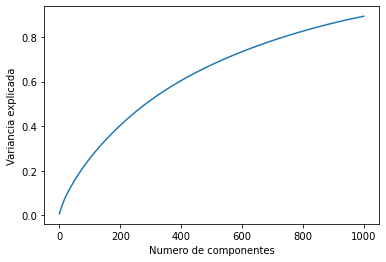

In [197]:
plt.plot(np.cumsum(text_process_pipe['pca'].explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Variancia explicada')

# Analise exploratoria de cada classe

Os dados possuem 2 classes são elas:

0 - Tweets sobre desastres que são fake (Não Desastre)

1 - Tweets sobre desastres que são reais (Desastre)

[Text(0, 0, 'Não Desastre'), Text(1, 0, 'Desastre')]

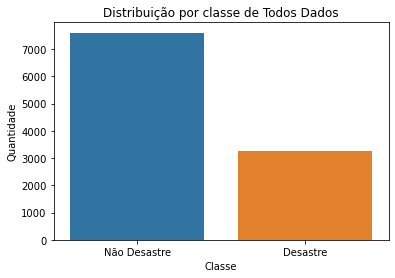

In [198]:
ax = sns.countplot(x='target',data = df)

ax.set_title('Distribuição por classe de Todos Dados')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Classe')
ax.set_xticklabels(["Não Desastre","Desastre"])

Podemos comparar algumas caracteristicas do texto, como tamanho do texto e a quantidade de tokens geradas por cada.

Text(0.5, 1.05, 'Distribuição da quantidade de caracteres do tweet por classe')

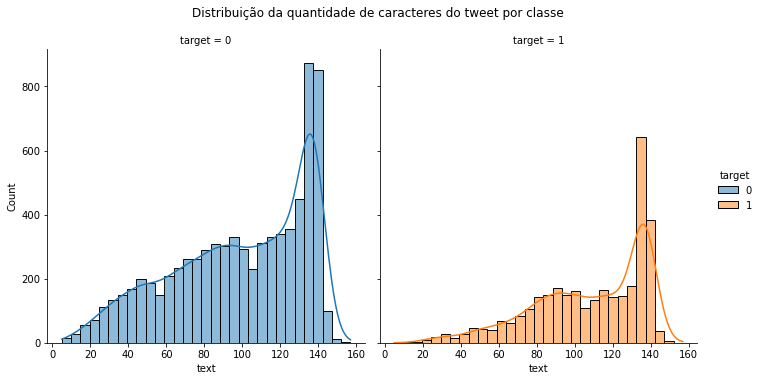

In [199]:
ax = sns.displot(x=df['text'].str.len(),data = df,col='target',hue='target',kde=True)

ax.fig.suptitle('Distribuição da quantidade de caracteres do tweet por classe',y=1.05)

# Classificadores

## Pipeline cria um pipeline para um classificador

## Knn

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3,5,7,11,13]}

clf = GridSearchCV(KNeighborsClassifier(), params, n_jobs = -1)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 13]})

In [205]:
clf.best_params_

{'n_neighbors': 3}

## Test

In [206]:
y_predicted = clf.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1510
           1       0.33      0.16      0.22       666

    accuracy                           0.64      2176
   macro avg       0.51      0.51      0.49      2176
weighted avg       0.58      0.64      0.60      2176

